In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astroquery.jplhorizons import Horizons
from scipy.constants import c
from astropy.time import Time
from astropy.coordinates import SkyCoord, ITRS
import astropy.units as u

plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['font.size'] = 14

In [2]:
query = Horizons(
    id = 'JUICE', location='500',  # geocentric
    epochs = {'start': '2023-04-15 05:30:00',
              'stop': '2023-04-15 08:30:00',
              'step': '1000'},
    )
eph = query.ephemerides()

In [3]:
ra = np.array(eph['RA']) * u.deg
dec = np.array(eph['DEC']) * u.deg
jd = np.array(eph['datetime_jd'])

In [4]:
obstime = Time(jd, format='jd')
satellite = SkyCoord(ra=ra, dec=dec, obstime=obstime)

In [5]:
antenna_coords = np.array([
    [-2524036.0307912203, -4123528.101172219, 4147706.408318585],  # 1a
    [-2523825.0029098387, -4123540.8439693213, 4147821.048239712],  # 5c
])
baseline_itrs = antenna_coords[0] - antenna_coords[1]

In [6]:
satellite_itrs = satellite.transform_to(ITRS).cartesian

In [7]:
w = baseline_itrs @ satellite_itrs.xyz.value

In [8]:
w_p = np.polyfit(jd - jd[0], w, 1)

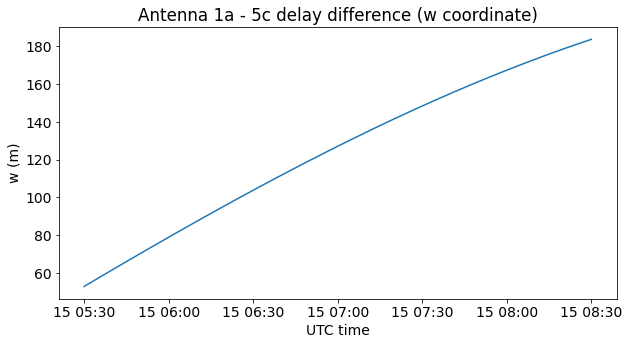

In [9]:
plt.plot(obstime.datetime, w)
plt.title('Antenna 1a - 5c delay difference (w coordinate)')
plt.ylabel('w (m)')
plt.xlabel('UTC time');

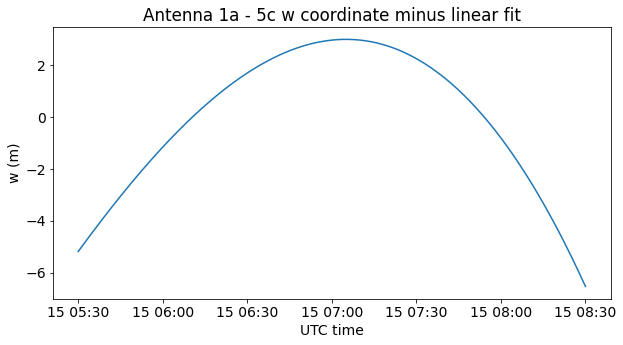

In [10]:
plt.plot(obstime.datetime, w - np.polyval(w_p, jd - jd[0]))
plt.title('Antenna 1a - 5c w coordinate minus linear fit')
plt.ylabel('w (m)')
plt.xlabel('UTC time');

In [11]:
eps = w_p[0] / (24*3600 * c)
eps

4.082495264454211e-11

In [12]:
s = np.float32(1+1e-6) - 1
print(f's = {s}')
N = round(s / eps)
print(f'N = {N}')
np.average([1] * (N-1) + [1+s]) - 1

s = 9.5367431640625e-07
N = 23360


4.0825121061516256e-11